# Projet : Consommation et production électrique en France

<img width=400 src="https://1.bp.blogspot.com/-_cw5mPFrxmc/XtuawSHRV0I/AAAAAAAAEWQ/52ff8l3-MKI0_ZdlJpwwyrH6tgh9diaOQCLcBGAsYHQ/s1600/uses-of-electricity-in-our-daily-life.jpg">
<p style="text-align: left"> Une  photo kitsch du réseau électrique </p>

## Présentation Du Dataset


<img src="./assets/image1.png" width="300"/>
<img src="./assets/image2.png" width="300"/>

**Informations issues du site (allez voir vous même également) :**

Ce jeu de données, rafraîchi une fois par jour, présente les données régionales de janvier 2013 à 2023. Elles sont issues de l'application éCO2mix. Elles sont élaborées à partir des comptages et complétées par des forfaits. 

Vous y trouverez au pas quart d'heure :

- Les prévisions de consommation établies la veille (J-1) et celles réactualisées le jour même (J).

Vous y trouverez au pas demi-heure :

- La consommation réalisée.
- La production selon les différentes filières composant le mix énergétique.
- La consommation des pompes dans les Stations de Transfert d'Energie par Pompage (STEP).
- Les échanges physiques aux frontières.
- Une estimation des émissions de carbone générées par la production d'électricité en France.
- Les échanges commerciaux aux frontières.
- Le découpage des filières par technologie du mix de production (débute en 2013).



<img src="./assets/image3.png" width="800"/>


## Objectifs et modalités de l'étude

**Modalités de l'étude :** 

- Vous travaillerez en groupe de 2 à 3.    
   
- Une présentation de votre travail sur une question sera effectuée en fin du projet. 
   
**Les objectifs de cette étude sont multiples :** 

- Apprendre à charger et manipuler des données réelles complexes avec Pandas. 

- Manipuler des séries temporelles. 

- Analyser des données pour répondre à une question exploratoire. 

- Présenter et vulgariser votre recherche exploratoire. 

**Notes sur les données RTE** :

- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata) : https://www.rte-france.com/eco2mix 
- Données agrégées au niveau national : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-national-cons-def/information/?disjunctive.nature 
- Données agrégées au niveau régional : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature

## Conseils & Remarques sur l'exploration des données

- La première étape de chargement, exploration et nettoyage de données peut être chronophage lorsqu'on traite des sets de données **réels**... Cela fait partie du travail de data scientist, il faut s'y faire :-)

> It takes less than five lines of code to train a basic machine learning algorithm. Exploratory data analysis and data preparation in comparison take longer and comprise of 80% of the data scientist’s time."  https://towardsdatascience.com/build-the-story-around-data-using-exploratory-data-analysis-and-pandas-c85bf3beff87

- Quand vous faîtes des recherches et que vous manipulez les données, n'oubliez pas de clarifier : **Quelle question/ hypothèse essayez-vous de résoudre/de prouver/ d'invalider ?**

- Votre notebook doit être **compréhensible**. Il doit vous permettre de partager vos recherches. Le lecteur final doit pouvoir le lire comme une histoire (collègue, vous dans un futur proche, etc.). Utilisez du **markdown** pour commenter votre code, discuter des résultats, insérer des images, ...

- **Table of Content** : mettez vous une table des matières et activez le **synchronize collapse state**. Ca vous permettre de vous y retrouver plus facilement. 

   
- Garantissez la **causalité** de votre notebook : l'ordre d'exécution des cellules dans un notebook est complexe. Ne faîtes pas l'erreur de ne pas vérifier que vous pouvez exécuter l'ensemble de vos cellules dans l'ordre. Sinon vous n'arriverez plus à exécuter votre notebook. 

- N'oubliez pas de reprendre les étapes d'exploration classiques des données vues précédemment (projets GapMinder, Arbres de Grenoble, ...) : afficher les informations sur vos dataframes, regardez les données, faites des sauvegardes intermédiaires (format .pkl par exemple), cherchez les outliers, les données manquantes, etc... 

- C'est une analyse exploratoire : **tatonnez**, **faîtes des graphiques**, ... 


- Lorsque c'est nécessaire (selon ce que vous cherchez) penser à normaliser/standardiser les données

- N'hésitez pas à **consulter l'aide de Pandas** ou à chercher la réponse à vos questions sur internet (quasiment tous les bugs que vous observerez on déjà fait l'objet d'un post sur **stackoverflow**)

**Ressources** :
-  Markdown : https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
-  Table of content : https://jupyterlab.readthedocs.io/en/stable/user/toc.html. 

# Chargement et préparation des données

&#x1F4A5; **To Do** 

- Charger les données nationales.
 
- Regarder les colonnes, sélectionner les données intéressantes.
 
- Les types inférés semblent-ils corrects ? Corriger si nécessaire (datetime, object, int, float, etc.)

- Choisir des noms de colonnes plus faciles à manipuler (espaces, accents...). <br/>Ressource : https://www.dataschool.io/pandas-dot-notation-vs-brackets/

- Choisir un index adéquat pour votre dataframe. Les lignes ont un comportement étrange, choisissez les lignes qui vous arrangent.

- Quelle période temporelle couvrent les données ?

- Faîtes un choix par rapport aux valeurs manquantes. Les garder sous forme de NaN ou une autre valeur ?

- Simplifiez le DataFrame : regardez vos colonnnes, cherchez à les comprendre et rassemblez celles que vous pouvez rassembler. 

- Sauvegardez vos données sous format **pkl** pour ne pas devoir refaire les pré-traitements à chaque fois que vous redémarrez le kernel.  


&#x1F4A5; **Ressources**

- La doc de pandas.

- Voici quelques fonctions en vrac dont vous aurez besoin (read_csv,  info,  drop, to_datetime, astype, nunique, set_index)

In [1]:
#charger les données  avec pandas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  # Module pour tracer les graphiques
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats

data = pd.read_csv(
    './Data/data_National_france.csv', 
    delimiter = ";", 
    header = 0,
    na_values=['ND']
    )
data['Date et Heure'] = pd.to_datetime(data['Date et Heure'], utc=True)   

data.head()

,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données définitives,2017-02-06,14:30,2017-02-06 13:30:00+00:00,72516.0,74500,73700,1046.0,1650.0,...,153.0,2534.0,4999.0,117.0,5172.0,1904.0,567.0,540.0,267.0,232.0
1,France,Données définitives,2017-02-06,15:45,2017-02-06 14:45:00+00:00,NaN,71000,70700,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2017-02-06,16:00,2017-02-06 15:00:00+00:00,70111.0,70600,70400,1052.0,1666.0,...,153.0,2558.0,5049.0,116.0,5198.0,1783.0,302.0,540.0,274.0,237.0
3,France,Données définitives,2017-02-06,16:30,2017-02-06 15:30:00+00:00,69784.0,69800,69800,1058.0,1659.0,...,153.0,2558.0,5101.0,117.0,5234.0,1922.0,554.0,541.0,274.0,234.0
4,France,Données définitives,2017-02-06,16:45,2017-02-06 15:45:00+00:00,NaN,69800,69800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388704 entries, 0 to 388703
Data columns (total 37 columns):
 #   Column                                     Non-Null Count   Dtype              
---  ------                                     --------------   -----              
 0   Périmètre                                  388704 non-null  object             
 1   Nature                                     388704 non-null  object             
 2   Date                                       388704 non-null  object             
 3   Heure                                      388704 non-null  object             
 4   Date et Heure                              388704 non-null  datetime64[ns, UTC]
 5   Consommation (MW)                          194352 non-null  float64            
 6   Prévision J-1 (MW)                         388704 non-null  int64              
 7   Prévision J (MW)                           388704 non-null  int64              
 8   Fioul (MW)                        

In [4]:
#Voir tous les colonnes 
data.columns

Index(['Périmètre', 'Nature', 'Date', 'Heure', 'Date et Heure',
       'Consommation (MW)', 'Prévision J-1 (MW)', 'Prévision J (MW)',
       'Fioul (MW)', 'Charbon (MW)', 'Gaz (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)', 'Taux de CO2 (g/kWh)',
       'Ech. comm. Angleterre (MW)', 'Ech. comm. Espagne (MW)',
       'Ech. comm. Italie (MW)', 'Ech. comm. Suisse (MW)',
       'Ech. comm. Allemagne-Belgique (MW)', 'Fioul - TAC (MW)',
       'Fioul - Cogénération (MW)', 'Fioul - Autres (MW)', 'Gaz - TAC (MW)',
       'Gaz - Cogénération (MW)', 'Gaz - CCG (MW)', 'Gaz - Autres (MW)',
       'Hydraulique - Fil de l'eau + éclusée (MW)', 'Hydraulique - Lacs (MW)',
       'Hydraulique - STEP turbinage (MW)', 'Bioénergies - Déchets (MW)',
       'Bioénergies - Biomasse (MW)', 'Bioénergies - Biogaz (MW)'],
      dtype='object')

In [5]:
#Regarder les colonnes, sélectionner les données intéressante
donnee = data.loc[:, "Date et Heure":]
donnee

,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,2017-02-06 13:30:00+00:00,72516.0,74500,73700,1046.0,1650.0,7803.0,52941.0,1833.0,2034.0,...,153.0,2534.0,4999.0,117.0,5172.0,1904.0,567.0,540.0,267.0,232.0
1,2017-02-06 14:45:00+00:00,NaN,71000,70700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-02-06 15:00:00+00:00,70111.0,70600,70400,1052.0,1666.0,7876.0,52975.0,1888.0,1149.0,...,153.0,2558.0,5049.0,116.0,5198.0,1783.0,302.0,540.0,274.0,237.0
3,2017-02-06 15:30:00+00:00,69784.0,69800,69800,1058.0,1659.0,7928.0,53049.0,1932.0,822.0,...,153.0,2558.0,5101.0,117.0,5234.0,1922.0,554.0,541.0,274.0,234.0
4,2017-02-06 15:45:00+00:00,NaN,69800,69800,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388699,2019-04-19 11:15:00+00:00,NaN,53600,53900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388700,2019-04-19 12:30:00+00:00,51722.0,51900,52100,122.0,24.0,935.0,43311.0,1814.0,6472.0,...,0.0,441.0,471.0,23.0,3384.0,347.0,0.0,404.0,329.0,296.0
388701,2019-04-19 17:30:00+00:00,48253.0,48100,48300,112.0,14.0,891.0,46111.0,1706.0,856.0,...,0.0,543.0,320.0,28.0,5203.0,1460.0,922.0,428.0,319.0,303.0
388702,2019-04-19 18:45:00+00:00,NaN,47900,48350,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Transformer les données en data frame 
df_data=pd.DataFrame(donnee)
df_data

,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,2017-02-06 13:30:00+00:00,72516.0,74500,73700,1046.0,1650.0,7803.0,52941.0,1833.0,2034.0,...,153.0,2534.0,4999.0,117.0,5172.0,1904.0,567.0,540.0,267.0,232.0
1,2017-02-06 14:45:00+00:00,NaN,71000,70700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-02-06 15:00:00+00:00,70111.0,70600,70400,1052.0,1666.0,7876.0,52975.0,1888.0,1149.0,...,153.0,2558.0,5049.0,116.0,5198.0,1783.0,302.0,540.0,274.0,237.0
3,2017-02-06 15:30:00+00:00,69784.0,69800,69800,1058.0,1659.0,7928.0,53049.0,1932.0,822.0,...,153.0,2558.0,5101.0,117.0,5234.0,1922.0,554.0,541.0,274.0,234.0
4,2017-02-06 15:45:00+00:00,NaN,69800,69800,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388699,2019-04-19 11:15:00+00:00,NaN,53600,53900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388700,2019-04-19 12:30:00+00:00,51722.0,51900,52100,122.0,24.0,935.0,43311.0,1814.0,6472.0,...,0.0,441.0,471.0,23.0,3384.0,347.0,0.0,404.0,329.0,296.0
388701,2019-04-19 17:30:00+00:00,48253.0,48100,48300,112.0,14.0,891.0,46111.0,1706.0,856.0,...,0.0,543.0,320.0,28.0,5203.0,1460.0,922.0,428.0,319.0,303.0
388702,2019-04-19 18:45:00+00:00,NaN,47900,48350,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#faire la colonne date et heure en index 
df_data_new =df_data.set_index("Date et Heure") 
df_data_new

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Date et Heure,,,,,,,,,,,,,,,,,,,,,
2017-02-06 13:30:00+00:00,72516.0,74500,73700,1046.0,1650.0,7803.0,52941.0,1833.0,2034.0,7643.0,...,153.0,2534.0,4999.0,117.0,5172.0,1904.0,567.0,540.0,267.0,232.0
2017-02-06 14:45:00+00:00,NaN,71000,70700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-06 15:00:00+00:00,70111.0,70600,70400,1052.0,1666.0,7876.0,52975.0,1888.0,1149.0,7283.0,...,153.0,2558.0,5049.0,116.0,5198.0,1783.0,302.0,540.0,274.0,237.0
2017-02-06 15:30:00+00:00,69784.0,69800,69800,1058.0,1659.0,7928.0,53049.0,1932.0,822.0,7710.0,...,153.0,2558.0,5101.0,117.0,5234.0,1922.0,554.0,541.0,274.0,234.0
2017-02-06 15:45:00+00:00,NaN,69800,69800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-19 11:15:00+00:00,NaN,53600,53900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-19 12:30:00+00:00,51722.0,51900,52100,122.0,24.0,935.0,43311.0,1814.0,6472.0,3731.0,...,0.0,441.0,471.0,23.0,3384.0,347.0,0.0,404.0,329.0,296.0
2019-04-19 17:30:00+00:00,48253.0,48100,48300,112.0,14.0,891.0,46111.0,1706.0,856.0,7585.0,...,0.0,543.0,320.0,28.0,5203.0,1460.0,922.0,428.0,319.0,303.0


In [8]:
#voir le type des donnes
df_data_new.dtypes

Consommation (MW)                            float64
Prévision J-1 (MW)                             int64
Prévision J (MW)                               int64
Fioul (MW)                                   float64
Charbon (MW)                                 float64
Gaz (MW)                                     float64
Nucléaire (MW)                               float64
Eolien (MW)                                  float64
Solaire (MW)                                 float64
Hydraulique (MW)                             float64
Pompage (MW)                                 float64
Bioénergies (MW)                             float64
Ech. physiques (MW)                          float64
Taux de CO2 (g/kWh)                          float64
Ech. comm. Angleterre (MW)                   float64
Ech. comm. Espagne (MW)                      float64
Ech. comm. Italie (MW)                       float64
Ech. comm. Suisse (MW)                       float64
Ech. comm. Allemagne-Belgique (MW)           f

In [9]:
# voire la taille 
df_data_new.shape

(388704, 32)

In [10]:
# voir le nom des colonnes 
df_data_new.columns

Index(['Consommation (MW)', 'Prévision J-1 (MW)', 'Prévision J (MW)',
       'Fioul (MW)', 'Charbon (MW)', 'Gaz (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)', 'Taux de CO2 (g/kWh)',
       'Ech. comm. Angleterre (MW)', 'Ech. comm. Espagne (MW)',
       'Ech. comm. Italie (MW)', 'Ech. comm. Suisse (MW)',
       'Ech. comm. Allemagne-Belgique (MW)', 'Fioul - TAC (MW)',
       'Fioul - Cogénération (MW)', 'Fioul - Autres (MW)', 'Gaz - TAC (MW)',
       'Gaz - Cogénération (MW)', 'Gaz - CCG (MW)', 'Gaz - Autres (MW)',
       'Hydraulique - Fil de l'eau + éclusée (MW)', 'Hydraulique - Lacs (MW)',
       'Hydraulique - STEP turbinage (MW)', 'Bioénergies - Déchets (MW)',
       'Bioénergies - Biomasse (MW)', 'Bioénergies - Biogaz (MW)'],
      dtype='object')

In [11]:
#regarder les valeurs manquants
df_data_new.isna().any().any()

True

In [12]:
#regarder les valeurs manquants
df_data_new.isna().sum()

Consommation (MW)                            194352
Prévision J-1 (MW)                                0
Prévision J (MW)                                  0
Fioul (MW)                                   194352
Charbon (MW)                                 194352
Gaz (MW)                                     194352
Nucléaire (MW)                               194352
Eolien (MW)                                  194352
Solaire (MW)                                 194352
Hydraulique (MW)                             194352
Pompage (MW)                                 194352
Bioénergies (MW)                             194352
Ech. physiques (MW)                          194352
Taux de CO2 (g/kWh)                          194352
Ech. comm. Angleterre (MW)                   194984
Ech. comm. Espagne (MW)                      194360
Ech. comm. Italie (MW)                       194370
Ech. comm. Suisse (MW)                       194360
Ech. comm. Allemagne-Belgique (MW)           194408
Fioul - TAC 

In [13]:
#Calcule la moyenne
df_data_new.mean()

Consommation (MW)                            53837.221161
Prévision J-1 (MW)                           53535.024119
Prévision J (MW)                             53454.017376
Fioul (MW)                                     271.111617
Charbon (MW)                                   892.383356
Gaz (MW)                                      3489.956738
Nucléaire (MW)                               43015.350534
Eolien (MW)                                   3054.226481
Solaire (MW)                                  1097.495961
Hydraulique (MW)                              7087.304978
Pompage (MW)                                  -791.424081
Bioénergies (MW)                               986.890776
Ech. physiques (MW)                          -5252.971227
Taux de CO2 (g/kWh)                             48.106070
Ech. comm. Angleterre (MW)                   -1050.608616
Ech. comm. Espagne (MW)                       -594.971020
Ech. comm. Italie (MW)                       -2000.737771
Ech. comm. Sui

In [14]:
# les ecarts-types
df_data_new.std()

Consommation (MW)                            11997.602173
Prévision J-1 (MW)                           11938.650830
Prévision J (MW)                             11932.780967
Fioul (MW)                                     282.043393
Charbon (MW)                                  1117.593466
Gaz (MW)                                      2478.392337
Nucléaire (MW)                                7904.942043
Eolien (MW)                                   2667.507362
Solaire (MW)                                  1762.096376
Hydraulique (MW)                              2800.742151
Pompage (MW)                                  1002.594212
Bioénergies (MW)                               185.180695
Ech. physiques (MW)                           4691.598123
Taux de CO2 (g/kWh)                             23.221915
Ech. comm. Angleterre (MW)                    1280.387899
Ech. comm. Espagne (MW)                       1682.774713
Ech. comm. Italie (MW)                        1036.991937
Ech. comm. Sui

In [15]:
#la mediane
df_data_new.median()

Consommation (MW)                            52086.0
Prévision J-1 (MW)                           51800.0
Prévision J (MW)                             51700.0
Fioul (MW)                                     191.0
Charbon (MW)                                   495.0
Gaz (MW)                                      3095.0
Nucléaire (MW)                               42552.0
Eolien (MW)                                   2191.0
Solaire (MW)                                    15.0
Hydraulique (MW)                              6848.0
Pompage (MW)                                  -187.0
Bioénergies (MW)                              1036.0
Ech. physiques (MW)                          -5871.0
Taux de CO2 (g/kWh)                             44.0
Ech. comm. Angleterre (MW)                   -1500.0
Ech. comm. Espagne (MW)                      -1000.0
Ech. comm. Italie (MW)                       -2362.0
Ech. comm. Suisse (MW)                       -1881.0
Ech. comm. Allemagne-Belgique (MW)            

In [123]:
# calcule le kurtosis
numeric_columns = df_data_new.select_dtypes(include=['number']).columns

# Compute kurtosis for numeric columns only
kurtosis_values = df_data_new[numeric_columns].kurt()

print(kurtosis_values)

Consommation (MW)                            -0.325969
Prévision J-1 (MW)                           -0.303838
Prévision J (MW)                             -0.059351
Fioul (MW)                                   59.988019
Charbon (MW)                                  1.908719
Gaz (MW)                                     -0.767606
Nucléaire (MW)                               -0.161057
Eolien (MW)                                   2.983189
Solaire (MW)                                  3.855784
Hydraulique (MW)                             -0.322585
Pompage (MW)                                 -0.230722
Bioénergies (MW)                             -0.568420
Ech. physiques (MW)                           0.298080
Taux de CO2 (g/kWh)                          -0.369707
Ech. comm. Angleterre (MW)                    1.195361
Ech. comm. Espagne (MW)                      -0.883028
Ech. comm. Italie (MW)                        0.232653
Ech. comm. Suisse (MW)                       -0.823475
Ech. comm.

In [16]:
# Les valeurs mins
df_data_new.min()

Consommation (MW)                            29124.0
Prévision J-1 (MW)                           28500.0
Prévision J (MW)                                 0.0
Fioul (MW)                                      18.0
Charbon (MW)                                  -133.0
Gaz (MW)                                       234.0
Nucléaire (MW)                               19164.0
Eolien (MW)                                     21.0
Solaire (MW)                                   -23.0
Hydraulique (MW)                              1387.0
Pompage (MW)                                 -4086.0
Bioénergies (MW)                               441.0
Ech. physiques (MW)                         -17891.0
Taux de CO2 (g/kWh)                              7.0
Ech. comm. Angleterre (MW)                   -3976.0
Ech. comm. Espagne (MW)                      -3792.0
Ech. comm. Italie (MW)                       -4317.0
Ech. comm. Suisse (MW)                       -3761.0
Ech. comm. Allemagne-Belgique (MW)           -

In [17]:
#Les valeurs max
df_data_new.max(numeric_only=True)

Consommation (MW)                            102098.0
Prévision J-1 (MW)                           101000.0
Prévision J (MW)                             102700.0
Fioul (MW)                                     5926.0
Charbon (MW)                                   6265.0
Gaz (MW)                                      10611.0
Nucléaire (MW)                                61712.0
Eolien (MW)                                   16363.0
Solaire (MW)                                  10863.0
Hydraulique (MW)                              17948.0
Pompage (MW)                                     -1.0
Bioénergies (MW)                               3252.0
Ech. physiques (MW)                           14608.0
Taux de CO2 (g/kWh)                             141.0
Ech. comm. Angleterre (MW)                     4028.0
Ech. comm. Espagne (MW)                        3838.0
Ech. comm. Italie (MW)                         1573.0
Ech. comm. Suisse (MW)                         2300.0
Ech. comm. Allemagne-Belgiqu

In [18]:
# faire une statistique descriptive
df_data_new.describe()

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
count,194352.000000,388704.000000,388704.000000,194352.000000,194352.000000,194352.000000,194352.000000,194352.000000,194352.000000,194352.000000,...,176783.000000,176783.000000,176783.000000,176783.000000,176783.000000,176783.000000,176783.000000,176783.000000,176783.000000,176783.000000
mean,53837.221161,53535.024119,53454.017376,271.111617,892.383356,3489.956738,43015.350534,3054.226481,1097.495961,7087.304978,...,36.540929,1188.538909,2146.138283,182.187693,4595.482710,1809.166758,670.074770,486.690819,271.521905,260.579914
std,11997.602173,11938.650830,11932.780967,282.043393,1117.593466,2478.392337,7904.942043,2667.507362,1762.096376,2800.742151,...,94.335245,991.010984,1809.975509,355.289072,1557.531344,1115.011081,748.637028,62.468816,74.404824,64.419308
min,29124.000000,28500.000000,0.000000,18.000000,-133.000000,234.000000,19164.000000,21.000000,-23.000000,1387.000000,...,-10.000000,164.000000,-18.000000,3.000000,1209.000000,46.000000,-2.000000,229.000000,111.000000,111.000000
25%,44705.000000,44450.000000,44500.000000,95.000000,15.000000,1146.000000,38477.000000,1183.000000,0.000000,4943.000000,...,-1.000000,367.000000,254.000000,50.000000,3301.000000,964.000000,13.000000,447.000000,218.000000,206.000000
50%,52086.000000,51800.000000,51700.000000,191.000000,495.000000,3095.000000,42552.000000,2191.000000,15.000000,6848.000000,...,4.000000,501.000000,1832.000000,70.000000,4681.000000,1606.000000,398.000000,492.000000,279.000000,264.000000
75%,62056.000000,61700.000000,61500.000000,356.000000,1452.000000,5172.000000,48256.000000,4034.000000,1692.000000,8981.000000,...,13.000000,2240.000000,3768.000000,104.000000,5858.500000,2426.000000,1083.000000,532.000000,314.000000,325.000000
max,102098.000000,101000.000000,102700.000000,5926.000000,6265.000000,10611.000000,61712.000000,16363.000000,10863.000000,17948.000000,...,790.000000,3396.000000,6580.000000,2530.000000,8298.000000,7211.000000,4293.000000,2655.000000,661.000000,448.000000


In [19]:
# la consommation la plus elevé
df_data_new['Consommation (MW)'].idxmax()

Timestamp('2012-02-08 18:00:00+0000', tz='UTC')

In [20]:
# la consommation la moin elevé
df_data_new['Consommation (MW)'].idxmin()

Timestamp('2020-05-10 05:00:00+0000', tz='UTC')

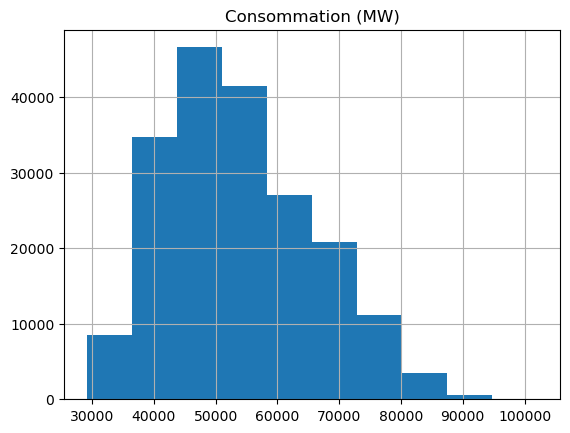

In [21]:
#histogramme pour la consonmation
df_data_new.hist("Consommation (MW)")
plt.show()

In [22]:
# A vous de jouer ! 

# Exploration du dataset National

## Réflexion

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et explorer les premières statistiques descriptives : 
- Quelles questions vous posez-vous sur les données ? 

- Qu'avez-vous envie d'explorer ? Soyez créatifs !

## Mise en application

&#x1F4A5; **To Do**
    
L'objectif ici est de **comprendre les données** présentes dans le dataset national que vous avez créé. 

---
- **Affichez vos données pour mieux les comprendre** : choisir plusieurs durées pour afficher vos données : semaine, mois, année, durée totale, faîtes des comparaisons... (pensez à utiliser des choses comme rolling mean) 
    - Tracer l'évolution de la consommation
    - Tracer l'évolution de la production par source d'énergie et au niveau global,
    - Tracer l'évolution de émissions de CO2.

---

- **Mix énergétique** :
    - Trouvez plusieurs manières de visualiser les données de production : plot, pie chart, rolling mean...
    - Quelle est la source de production largement majoritaire ?
    - Quelle est l'évolution de la part des énergies fossiles dans le mix énergétique ?  
    - Quelle est l'évolution de la part des énergies renouvelables dans le mix énergétique français ?
    - Quelle est la part de chaque filière de production d'énergies renouvelables (hydraulique, solaire, ...) 

---

- **Autonomie électrique** :
    - comparer la production totale française à la consommation totale. Quelle est le taux d'indépendance énergétique de la france au cours du temps ? C'est à dire la proportion du temps où la France est autonome en énergie. Faire le caclul sur la durée totale mais aussi par année et par mois.
    - Trouver les outliers    
---

- **Equilibre du réseau électrique** : Vérifier que la production, la consommation et les échanges commerciaux s'équilibrent en permanence. <br/> Ressource pour comprendre : https://fr.wikipedia.org/wiki/Ajustement_offre-demande_d%27%C3%A9lectricit%C3%A9 

---

- **Analyser la tendance des données** :
    - Analyser la saisonnalité des productions, comparer les mois de l'année entre eux. Quand consomme-t-on le plus ?
    - Printemps vs Eté vs Automne vs Hiver ?
    - Quelle est la tendance générale de l'évolution à long terme de la production d'énergie solaire ?
    - Quelle est la tendance générale de l'évolution à long terme de l'émission de CO2 ?

---

- **Impact des sources primaires de production sur le Taux de CO2** :
    - Corrélez les données entre elles et déduisez-en l'impact positif ou négatif de chacune des sources de production sur l'estimation du taux de CO2 émis.
    <br/> **Pandas** : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
    <br/> **Théorie** : https://data36.com/correlation-definition-calculation-corr-pandas/

---
- [Bonus] **Analyser les périodicités des données** :
    - Réaliser une analyse de Fourier de vos séries temporelles
      <br/> **Théorie et pratique** : https://realpython.com/python-scipy-fft/

---

- **Géopolitique** :
    - Visualisez et analysez l'impact du COVID et de la guerre en Ukraine sur le réseau électrique ?

---

&#x1F4A5; **Aide**
- Ressource utile pour vous aider à analyser les données : https://www.statistiques.developpement-durable.gouv.fr/edition-numerique/bilan-energetique-2020/
- `pandas.DataFrame.rolling` vous aidera à afficher vos données et en comprendre les tendances. 
- Les `pandas.Grouper` vous aideront pour grouper les données temporelles.
- la méthode `.plot()` fonctionne parfaitement avec un datetime en index
- Corrélation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- attention aux `NaN` pour les plots.

In [23]:
df_data_new.isna().sum()

Consommation (MW)                            194352
Prévision J-1 (MW)                                0
Prévision J (MW)                                  0
Fioul (MW)                                   194352
Charbon (MW)                                 194352
Gaz (MW)                                     194352
Nucléaire (MW)                               194352
Eolien (MW)                                  194352
Solaire (MW)                                 194352
Hydraulique (MW)                             194352
Pompage (MW)                                 194352
Bioénergies (MW)                             194352
Ech. physiques (MW)                          194352
Taux de CO2 (g/kWh)                          194352
Ech. comm. Angleterre (MW)                   194984
Ech. comm. Espagne (MW)                      194360
Ech. comm. Italie (MW)                       194370
Ech. comm. Suisse (MW)                       194360
Ech. comm. Allemagne-Belgique (MW)           194408
Fioul - TAC 

In [24]:
data_new = df_data_new.dropna()
data_new

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Date et Heure,,,,,,,,,,,,,,,,,,,,,
2017-02-06 13:30:00+00:00,72516.0,74500,73700,1046.0,1650.0,7803.0,52941.0,1833.0,2034.0,7643.0,...,153.0,2534.0,4999.0,117.0,5172.0,1904.0,567.0,540.0,267.0,232.0
2017-02-06 15:00:00+00:00,70111.0,70600,70400,1052.0,1666.0,7876.0,52975.0,1888.0,1149.0,7283.0,...,153.0,2558.0,5049.0,116.0,5198.0,1783.0,302.0,540.0,274.0,237.0
2017-02-06 15:30:00+00:00,69784.0,69800,69800,1058.0,1659.0,7928.0,53049.0,1932.0,822.0,7710.0,...,153.0,2558.0,5101.0,117.0,5234.0,1922.0,554.0,541.0,274.0,234.0
2017-02-06 17:30:00+00:00,75817.0,75500,75900,1062.0,1587.0,8121.0,53229.0,1983.0,-2.0,11380.0,...,154.0,2638.0,5212.0,117.0,5987.0,2876.0,2517.0,548.0,276.0,244.0
2017-02-06 21:30:00+00:00,67017.0,67600,67700,748.0,1281.0,7518.0,52253.0,2401.0,-1.0,6342.0,...,9.0,2625.0,4768.0,117.0,5443.0,899.0,0.0,544.0,281.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-18 19:30:00+00:00,51013.0,49800,50100,110.0,25.0,3242.0,43753.0,4074.0,0.0,7647.0,...,0.0,574.0,2645.0,24.0,4755.0,1762.0,1130.0,412.0,328.0,304.0
2019-04-19 02:00:00+00:00,41590.0,41100,41600,120.0,23.0,1023.0,43651.0,3492.0,0.0,3493.0,...,0.0,489.0,519.0,15.0,3330.0,163.0,0.0,439.0,333.0,300.0
2019-04-19 04:30:00+00:00,47287.0,47800,47600,122.0,25.0,1229.0,45270.0,3445.0,0.0,4261.0,...,0.0,562.0,650.0,18.0,3658.0,604.0,0.0,427.0,331.0,297.0


In [25]:
# nous allons s'implifie les données 
#df_donne= df_data_new.loc[:,"Consommation (MW)":"Bioénergies (MW)"]
#df_donne

In [26]:
#Afficher vos données : semaine, mois, année, durée totale, faîtes des comparaisons... (pensez à utiliser des choses comme rolling mean) 

In [27]:
# je trie ms indxe 
df_trie= data_new.sort_index()


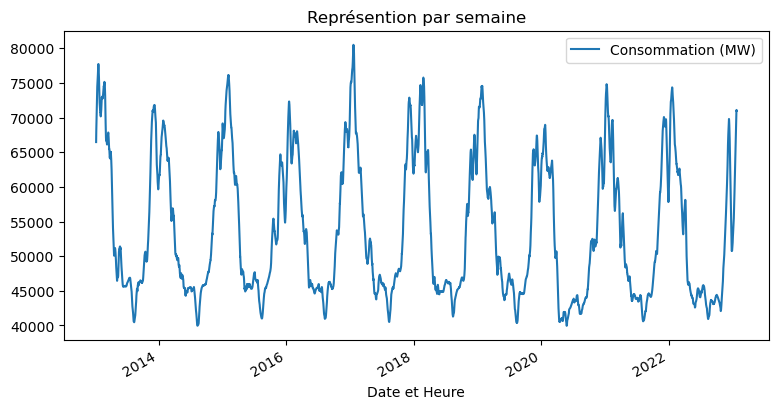

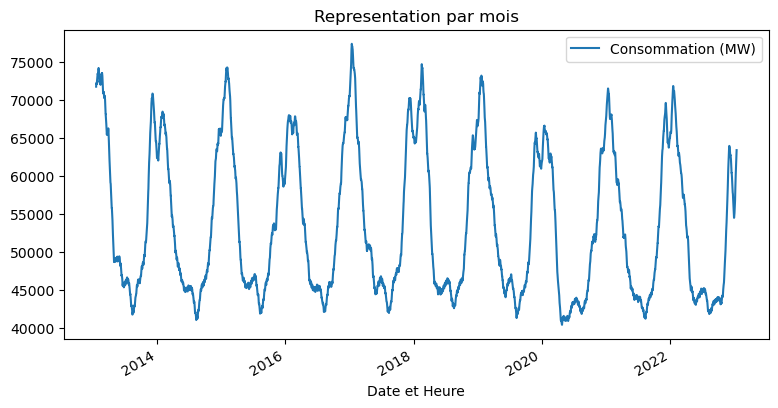

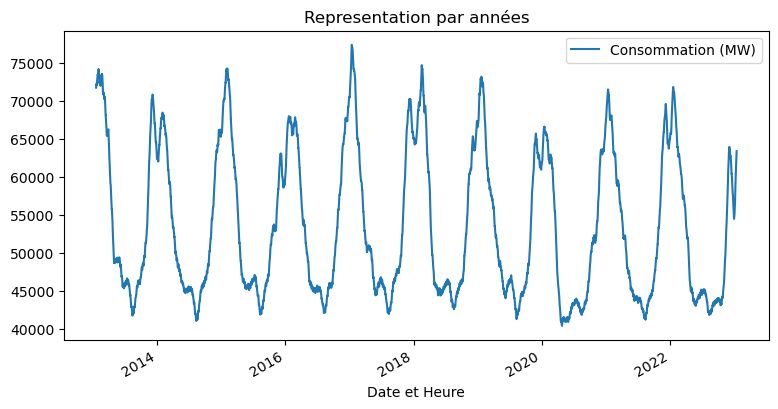

In [28]:
#afficher les donnée par semaine
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
df_semaines = df_trie["Consommation (MW)"].rolling( window=672 , center= True).mean()
df_semaines.plot()
plt.title('Représention par semaine')
plt.legend()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
df_mois = df_trie["Consommation (MW)"].rolling(window=1440 , center= True).mean()
df_mois.plot()
plt.title('Representation par mois')
plt.legend()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
df_annees = df_trie["Consommation (MW)"].rolling(window=1440 , center= True).mean()
df_annees.plot()
plt.title('Representation par années')
plt.legend()

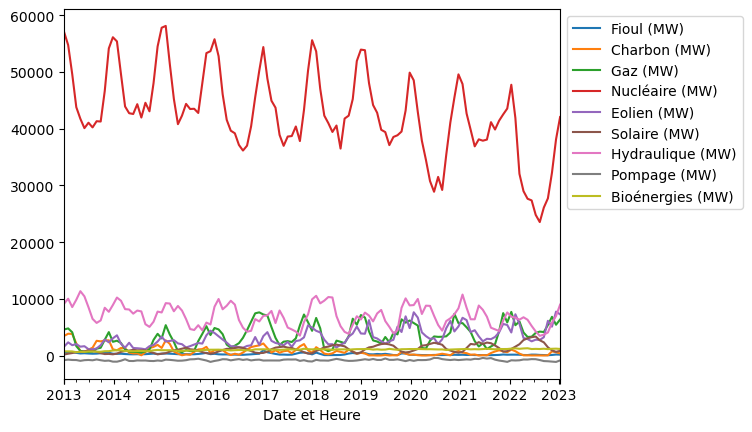

In [30]:
# tracer l'évolution de production  en année entre 
df_annee= df_trie.loc[:,"Fioul (MW)":"Bioénergies (MW)"].resample('30D').mean()
df_annee.plot()
plt.legend(bbox_to_anchor=(1,1))

In [32]:
df_semaine= df_trie.resample(rule='W').mean()
df_Mois=df_trie.resample(rule='M').mean()
df_annee= df_trie.resample(rule='Y').mean()

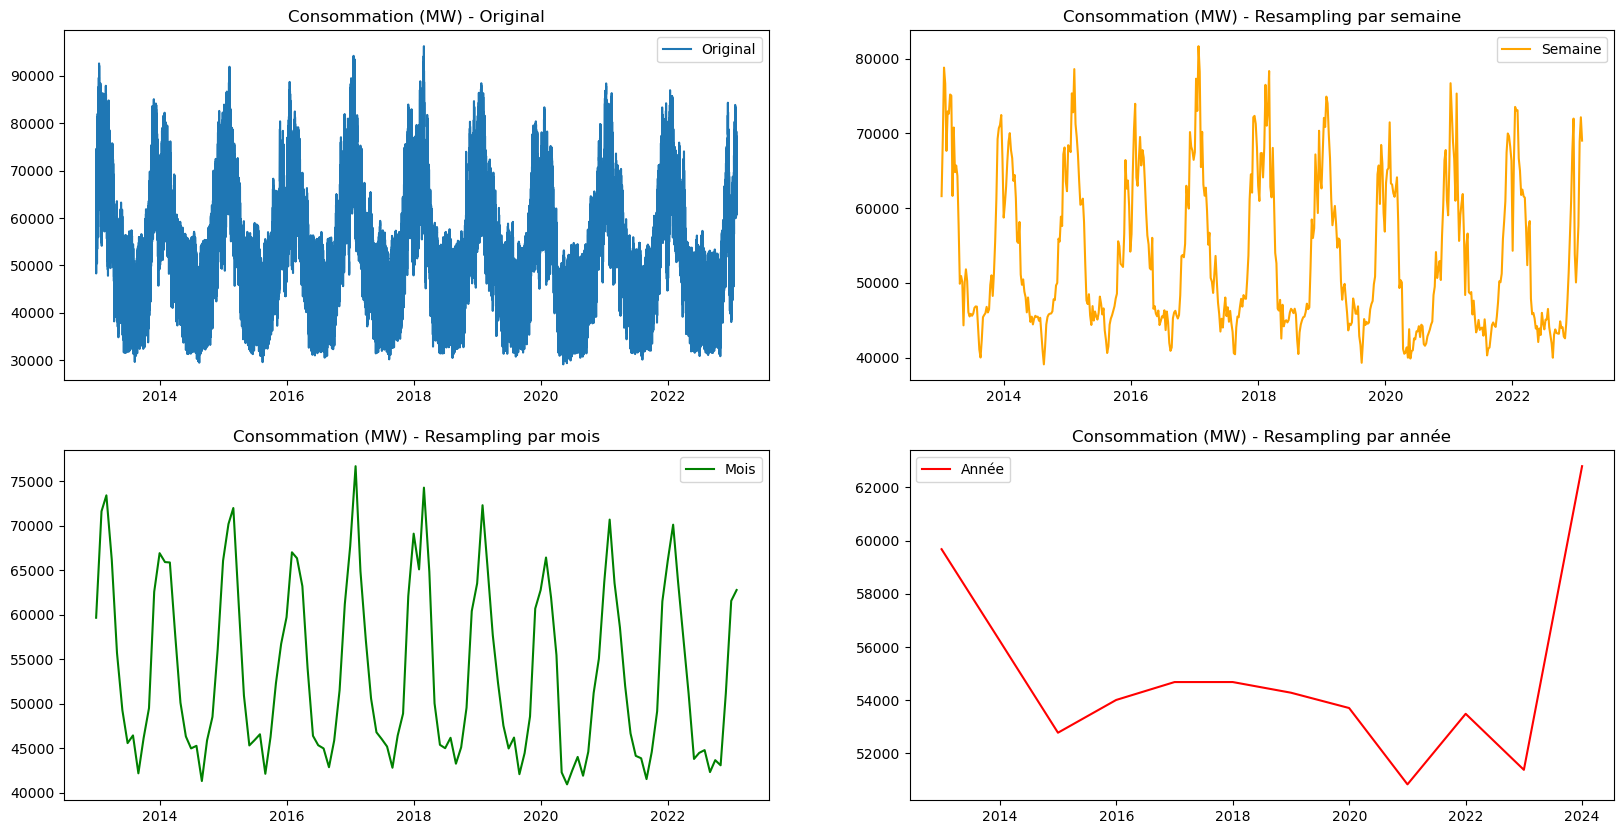

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.plot(df_trie.index, df_trie['Consommation (MW)'], label='Original')
plt.title('Consommation (MW) - Original')
plt.legend()

plt.subplot(2, 2,2 )
plt.plot(df_semaine.index, df_semaine['Consommation (MW)'], label='Semaine', color='orange')
plt.title('Consommation (MW) - Resampling par semaine')
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(df_Mois.index, df_Mois['Consommation (MW)'], label='Mois', color='green')
plt.title('Consommation (MW) - Resampling par mois')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(df_annee.index, df_annee['Consommation (MW)'], label='Année', color='red')
plt.title('Consommation (MW) - Resampling par année')
plt.legend()

plt.show()

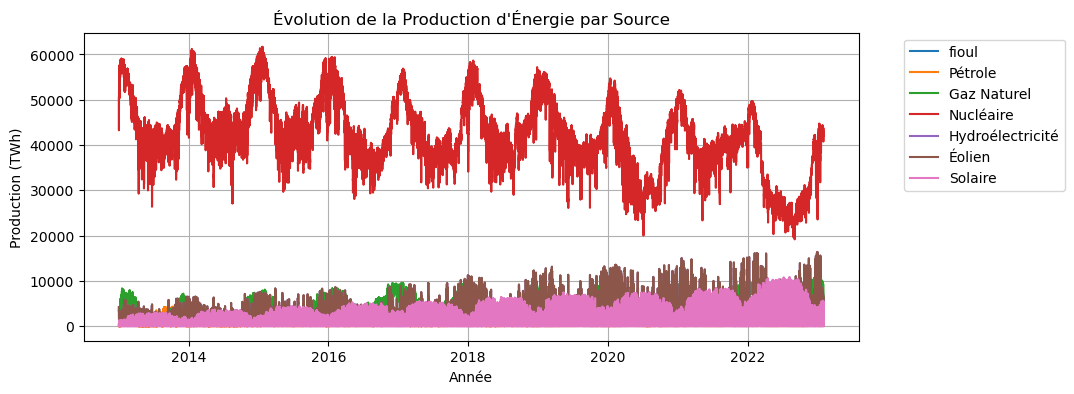

In [34]:
# Tracer l'évolution de la production d'énergie par source
plt.figure(figsize=(10, 4))
plt.plot(df_trie.index, df_trie['Fioul (MW)'], label='fioul')
plt.plot(df_trie.index, df_trie['Charbon (MW)'], label='Pétrole')
plt.plot(df_trie.index, df_trie['Gaz (MW)'], label='Gaz Naturel')
plt.plot(df_trie.index, df_trie['Nucléaire (MW)'], label='Nucléaire')
plt.plot(df_trie.index, df_trie['Eolien (MW)'], label='Hydroélectricité')
plt.plot(df_trie.index, df_trie['Eolien (MW)'], label='Éolien')
plt.plot(df_trie.index, df_trie['Solaire (MW)'], label='Solaire')

# Ajouter des détails au graphique
plt.title("Évolution de la Production d'Énergie par Source")
plt.xlabel("Année")
plt.ylabel("Production (TWh)")
plt.legend()
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Afficher le graphique
plt.show()


In [35]:
df_trie.corr().head()

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Consommation (MW),1.000000,0.996033,0.989909,0.428867,0.526071,0.708670,0.708963,0.178276,-0.034868,0.509025,...,0.275054,0.784601,0.490225,0.206520,0.297700,0.611364,0.382538,0.203718,-0.066754,-0.055124
Prévision J-1 (MW),0.996033,1.000000,0.988980,0.427721,0.528383,0.714469,0.707953,0.158368,-0.037752,0.506372,...,0.277393,0.781451,0.501398,0.198397,0.291101,0.612443,0.384689,0.201102,-0.065804,-0.054751
Prévision J (MW),0.989909,0.988980,1.000000,0.428038,0.524461,0.705425,0.703704,0.158131,-0.039272,0.506190,...,0.274862,0.776010,0.492331,0.197065,0.290768,0.612085,0.385232,0.201834,-0.066736,-0.057462
Fioul (MW),0.428867,0.427721,0.428038,1.000000,0.443975,0.295477,0.376222,-0.149856,-0.116775,0.232898,...,0.242911,0.340462,0.220244,-0.066068,0.103492,0.304623,0.205917,-0.022397,-0.272257,-0.345154
Charbon (MW),0.526071,0.528383,0.524461,0.443975,1.000000,0.287832,0.464121,-0.204106,-0.158855,0.206699,...,0.103027,0.353825,0.188953,0.039426,0.064773,0.320314,0.164588,-0.122525,-0.373203,-0.458266


<Axes: xlabel='Consommation (MW)', ylabel='Solaire (MW)'>

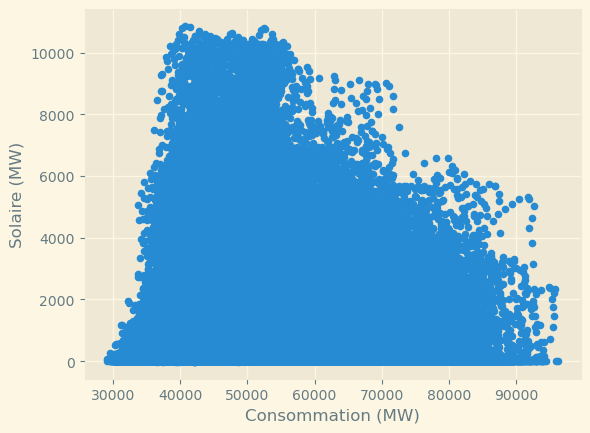

In [85]:
# voir la correlation entre consommation et fliol
df_trie.plot.scatter("Consommation (MW)", "Solaire (MW)")


<Axes: xlabel='month'>

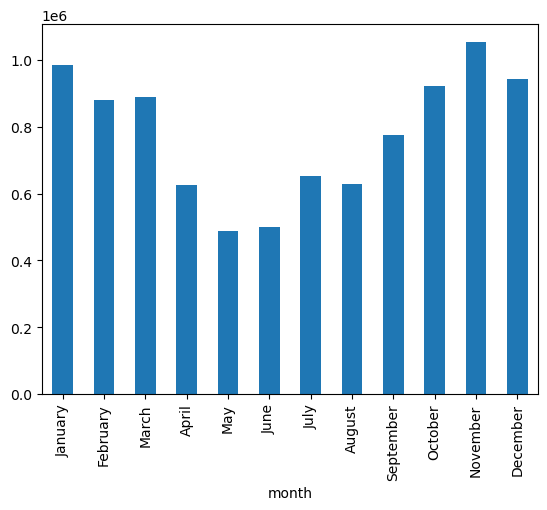

In [37]:
#df_trie.scatter_matrix(df_trie)
# CO2 par année --> pieplot

mois=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_data_new['month'] = df_data_new.index.month_name()
df_data_new.groupby('month').sum()['Taux de CO2 (g/kWh)'].reindex(mois).plot.bar()

<Axes: xlabel='month'>

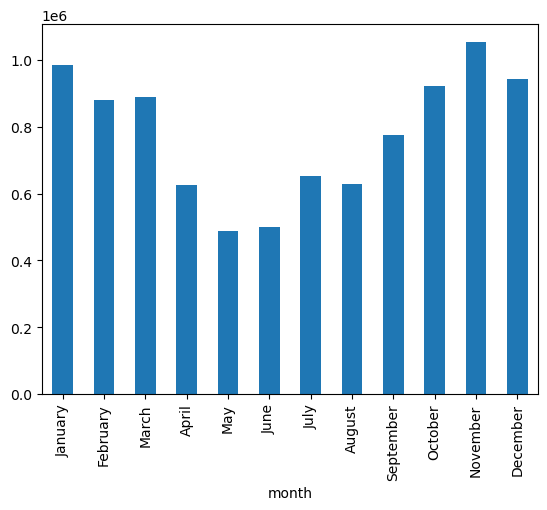

In [38]:
# CO2 par mois --> histogramme
mois = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Add a 'month' column to the DataFrame based on the index
df_data_new['month'] = df_data_new.index.month_name()

# Group by 'month', sum the values, and select the 'Taux de CO2 (g/kWh)' column
monthly_sum = df_data_new.groupby('month').sum()

# Reindex the DataFrame to ensure the months are in the desired order
monthly_sum_reindexed = monthly_sum.reindex(mois)

# Plot the 'Taux de CO2 (g/kWh)' column as a bar chart
monthly_sum_reindexed['Taux de CO2 (g/kWh)'].plot.bar()

<Axes: xlabel='hour'>

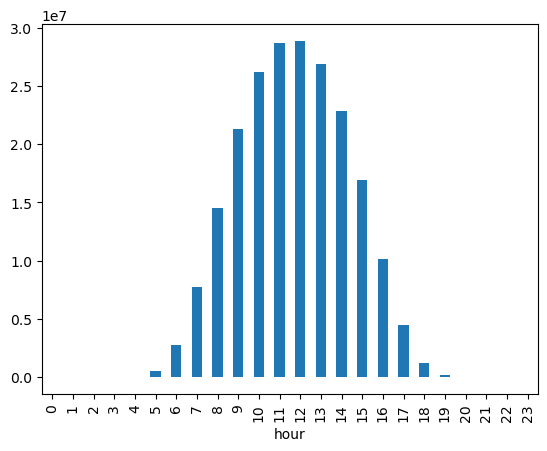

In [39]:
#Representation du solaire 
df_data_new['hour'] = df_data_new.index.hour
df_data_new.groupby('hour').sum()['Solaire (MW)'].plot.bar()

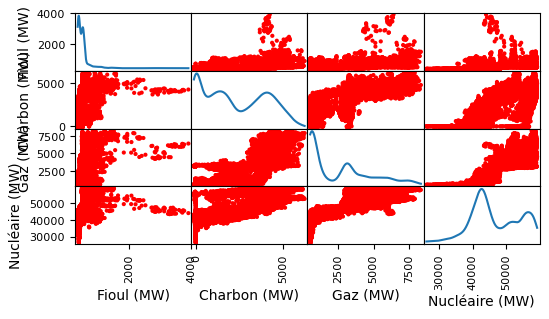

In [42]:
#Visualiser l'ensemble des scatter-plot possibles d'un jeu de données avec la fonction scatter_matrix :
scatter_matrix(df_trie.iloc[:10000,3:7], alpha = 1, figsize = (6, 3), diagonal = 'kde',color="red")

plt.show() # On voit que les variables discrètes sont éliminées

In [48]:
# regarder le coefficiant de  correlation
corr = df_trie.corr()
corr.style.background_gradient(cmap='coolwarm')

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Consommation (MW),1.000000,0.996033,0.989909,0.428867,0.526071,0.708670,0.708963,0.178276,-0.034868,0.509025,0.344246,0.026196,0.351817,0.539942,0.051118,0.261338,-0.038856,-0.007971,0.430744,0.189839,0.224821,0.362507,0.275054,0.784601,0.490225,0.206520,0.297700,0.611364,0.382538,0.203718,-0.066754,-0.055124
Prévision J-1 (MW),0.996033,1.000000,0.988980,0.427721,0.528383,0.714469,0.707953,0.158368,-0.037752,0.506372,0.352483,0.025756,0.352474,0.546588,0.051803,0.260522,-0.035665,0.001713,0.428844,0.184841,0.218502,0.366028,0.277393,0.781451,0.501398,0.198397,0.291101,0.612443,0.384689,0.201102,-0.065804,-0.054751
Prévision J (MW),0.989909,0.988980,1.000000,0.428038,0.524461,0.705425,0.703704,0.158131,-0.039272,0.506190,0.350066,0.024528,0.351125,0.540906,0.054542,0.259615,-0.032897,0.004807,0.423335,0.189506,0.218134,0.364049,0.274862,0.776010,0.492331,0.197065,0.290768,0.612085,0.385232,0.201834,-0.066736,-0.057462
Fioul (MW),0.428867,0.427721,0.428038,1.000000,0.443975,0.295477,0.376222,-0.149856,-0.116775,0.232898,0.128338,-0.271883,0.120820,0.489948,0.053610,0.131018,0.026866,0.057603,0.071772,0.531807,0.356589,0.861352,0.242911,0.340462,0.220244,-0.066068,0.103492,0.304623,0.205917,-0.022397,-0.272257,-0.345154
Charbon (MW),0.526071,0.528383,0.524461,0.443975,1.000000,0.287832,0.464121,-0.204106,-0.158855,0.206699,0.158982,-0.402120,0.191794,0.790523,0.074677,0.164627,-0.025316,-0.006981,0.205832,0.112323,0.531182,0.310444,0.103027,0.353825,0.188953,0.039426,0.064773,0.320314,0.164588,-0.122525,-0.373203,-0.458266
Gaz (MW),0.708670,0.714469,0.705425,0.295477,0.287832,1.000000,0.269610,0.124723,-0.049183,0.164651,0.248117,0.391792,0.503085,0.669840,0.336934,0.282173,0.013828,0.051084,0.496795,0.163441,-0.201660,0.367772,0.423162,0.674352,0.917103,0.341611,-0.068934,0.353436,0.235624,0.321076,0.287001,0.337912
Nucléaire (MW),0.708963,0.707953,0.703704,0.376222,0.464121,0.269610,1.000000,-0.007756,-0.275227,0.360687,0.085518,-0.254693,-0.253957,0.279474,-0.357641,-0.078138,-0.197060,-0.289932,0.012508,0.032525,0.487456,0.274351,-0.096187,0.661882,0.041233,-0.141826,0.307591,0.391161,0.132628,0.188130,-0.347811,-0.417735
Eolien (MW),0.178276,0.158368,0.158131,-0.149856,-0.204106,0.124723,-0.007756,1.000000,-0.082164,-0.038045,-0.129660,0.346856,-0.058893,-0.198947,0.000657,0.027766,-0.218810,-0.324545,0.110037,-0.046227,-0.225721,-0.083600,0.020091,0.259844,-0.012533,0.207841,0.017531,-0.060061,-0.089882,0.170369,0.276341,0.383950
Solaire (MW),-0.034868,-0.037752,-0.039272,-0.116775,-0.158855,-0.049183,-0.275227,-0.082164,1.000000,-0.080334,0.145771,0.116748,0.109665,-0.167376,0.052275,-0.028224,0.082577,0.164805,0.042383,-0.002686,-0.208244,-0.067285,0.046747,-0.216015,0.041425,0.034644,-0.077468,-0.092015,-0.003595,-0.094631,0.161692,0.197336
Hydraulique (MW),0.509025,0.506372,0.506190,0.232898,0.206699,0.164651,0.360687,-0.038045,-0.080334,1.000000,0.457059,-0.188649,-0.095430,0.030976,-0.235099,0.097620,-0.055162,0.131378,-0.130313,0.182587,0.179445,0.131338,0.095688,0.261768,0.075795,0.011801,0.855381,0.875170,0.674077,-0.074991,-0.195496,-0.174042


<Axes: ylabel='Consommation (MW)'>

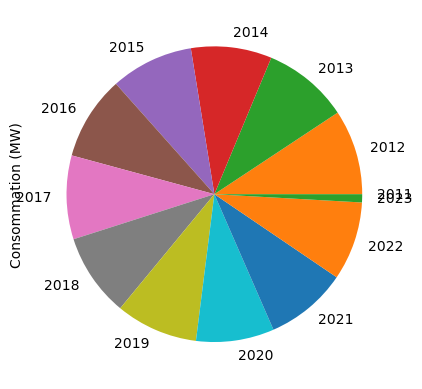

In [45]:
#visualisation de la production 
#Trouvez plusieurs manièAres de visualiser les données de production : plot, pie chart, rolling mean...
# Par pie chart pour 

#Representation du solaire 
df_data_new['year'] = df_data_new.index.year
df_data_new.groupby('year').sum()['Consommation (MW)'].plot.pie()


In [83]:
productions= df_trie[['Charbon (MW)', 'Nucléaire (MW)','Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Bioénergies (MW)']].sum()
productions

Charbon (MW)        1.384816e+08
Nucléaire (MW)      7.548826e+09
Eolien (MW)         5.636974e+08
Solaire (MW)        2.056929e+08
Hydraulique (MW)    1.250466e+09
Bioénergies (MW)    1.800909e+08
dtype: float64

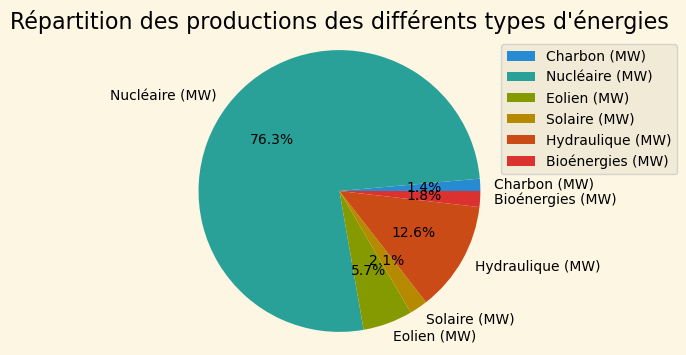

In [81]:
# la part des energies renouvalable 

productions= df_trie[['Charbon (MW)', 'Nucléaire (MW)','Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Bioénergies (MW)']].sum()

energies_renouvelables = ['Charbon (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']

# Ensure lengths match
assert len(productions) == len(energies_renouvelables), "Length of productions must match length of energy labels."

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(productions, labels=energies_renouvelables, autopct='%1.1f%%')
plt.title("Répartition des productions des différents types d'énergies")
plt.axis('equal') 
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.style.use('Solarize_Light2')
plt.show()

<Axes: >

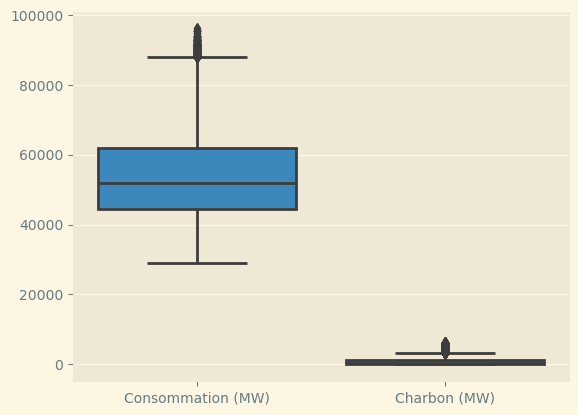

In [100]:
#les valeurs aberrantes (outlier)
# Un outlier ou valeur aberrante correspond à une valeur éloignée de la distribution de la variable.
#Par exemple la consommation

sns.boxplot(df_trie[['Consommation (MW)', 'Charbon (MW)']])

In [113]:
	
#On supprime les valeurs aberrantes

#On calcule Q1

q1=df_trie["Consommation (MW)"].quantile(q=0.25)

#On calcule Q3

q3=df_trie["Consommation (MW)"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

df_valeur_aberrante= df_trie[df_trie["Consommation (MW)"]<borne_sup]
df_valeur_aberrante=df_trie[df_trie["Consommation (MW)"]>borne_inf]



In [114]:
outliers= df_valeur_aberranteeee.loc[:,'Consommation (MW)']
outliers

Date et Heure
2012-12-31 23:30:00+00:00    59674.0
2013-01-01 00:00:00+00:00    57877.0
2013-01-01 00:30:00+00:00    57755.0
2013-01-01 01:00:00+00:00    57243.0
2013-01-01 01:30:00+00:00    56660.0
                              ...   
2023-01-31 20:30:00+00:00    64603.0
2023-01-31 21:00:00+00:00    63276.0
2023-01-31 21:30:00+00:00    63542.0
2023-01-31 22:00:00+00:00    64893.0
2023-01-31 22:30:00+00:00    63946.0
Name: Consommation (MW), Length: 176729, dtype: float64

In [119]:
df_trie.loc[:,'Consommation (MW)']

Date et Heure
2012-12-31 23:30:00+00:00    59674.0
2013-01-01 00:00:00+00:00    57877.0
2013-01-01 00:30:00+00:00    57755.0
2013-01-01 01:00:00+00:00    57243.0
2013-01-01 01:30:00+00:00    56660.0
                              ...   
2023-01-31 20:30:00+00:00    64603.0
2023-01-31 21:00:00+00:00    63276.0
2023-01-31 21:30:00+00:00    63542.0
2023-01-31 22:00:00+00:00    64893.0
2023-01-31 22:30:00+00:00    63946.0
Name: Consommation (MW), Length: 176729, dtype: float64

In [118]:
#Le Z-Score est également appelé score standard. Cette valeur/score permet de comprendre à quelle distance se trouve le point de données par rapport à la moyenne
z = np.abs(stats.zscore(df_trie["Consommation (MW)"]))
print(z)

Date et Heure
2012-12-31 23:30:00+00:00    0.504021
2013-01-01 00:00:00+00:00    0.352759
2013-01-01 00:30:00+00:00    0.342490
2013-01-01 01:00:00+00:00    0.299393
2013-01-01 01:30:00+00:00    0.250319
                               ...   
2023-01-31 20:30:00+00:00    0.918918
2023-01-31 21:00:00+00:00    0.807218
2023-01-31 21:30:00+00:00    0.829609
2023-01-31 22:00:00+00:00    0.943329
2023-01-31 22:30:00+00:00    0.863615
Name: Consommation (MW), Length: 176729, dtype: float64


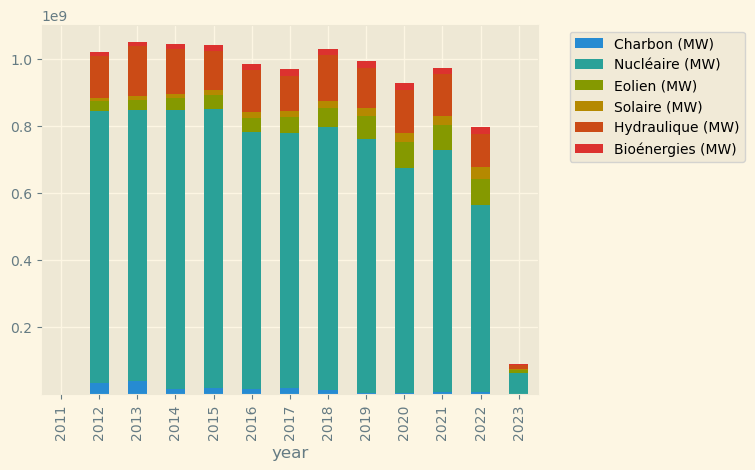

In [132]:

energies_renouvelables = ['Charbon (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']
df_data_new['year'] = df_data_new.index.year
df_data_new.groupby('year').sum().plot(kind='bar',y=energies_renouvelables, stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


In [ ]:
#Analyser la saisonnalité des productions, comparer les mois de l'année entre eux
